In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-production-in-india/crop_production.csv


# Importing Necessary Tools

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Loading :**

In [2]:
data = pandas.read_csv("crop_production.csv")
data.head(7)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0


In [3]:
df = data.copy()
df.dropna(axis=0, inplace=True)
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [4]:
df["Crop"].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [5]:
crop_count = df["Crop"].value_counts()
df = df.loc[df["Crop"].isin(crop_count.index[crop_count > 1500])]

# Seperating rice (🍚) from other crops 

In [6]:
Rice = df[(df["Crop"] == "Rice")]
Rice["production"] = Rice["Production"]/10000
Rice.head()

C:\Users\prsdj\AppData\Local\Temp/ipykernel_15352/4125679075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rice["production"] = Rice["Production"]/10000


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,0.032100
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,0.030000
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,0.051084
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,0.009017
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,0.007257


**Regression plot :**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


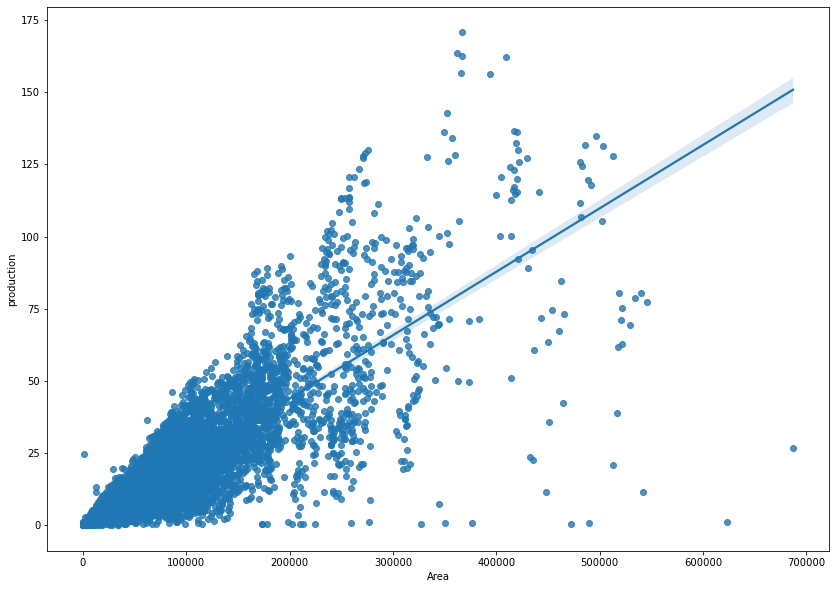

In [7]:
plt.figure(figsize=(14, 10))
sns.regplot(Rice["Area"], Rice["production"])
plt.show()

In [8]:
dt = Rice.copy()

# Preprocessing and splitting labels and targets

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
le = LabelEncoder()
scaler = MinMaxScaler()
dt["district"] = le.fit_transform(dt["District_Name"])
dt['season'] = le.fit_transform(dt["Season"])
dt["area"] = scaler.fit_transform(dt[["Area"]])
dt["state"] = le.fit_transform(dt["State_Name"])

In [10]:
X = dt[["area", "district", "season", "state"]]
y = dt["Production"]

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

# Model building and scoring

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9503005334292955


# Wheat 

In [13]:
wheat = data[data["Crop"] == "Wheat"]

In [14]:
wheat1 = wheat.copy()
wheat1['prod'] = wheat["Production"]/1000
wheat1["area"] = wheat["Area"]/1000
wheat1.dropna(inplace=True)

In [15]:
wheat1["season"] = le.fit_transform(wheat1["Season"])
wheat1["dist"] = le.fit_transform(wheat1["District_Name"])
wheat1["state"] = le.fit_transform(wheat1["State_Name"])

In [16]:
X = wheat1[["area", "season", "dist", "state"]]
y = wheat1['prod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [17]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9727892175556173


***It's very inaccurate to predict production for different crops.
But it's very precise to prdict production for a single crop.***

*If you like this notebook, upvote it.*

*Any sugesions in the comments below*